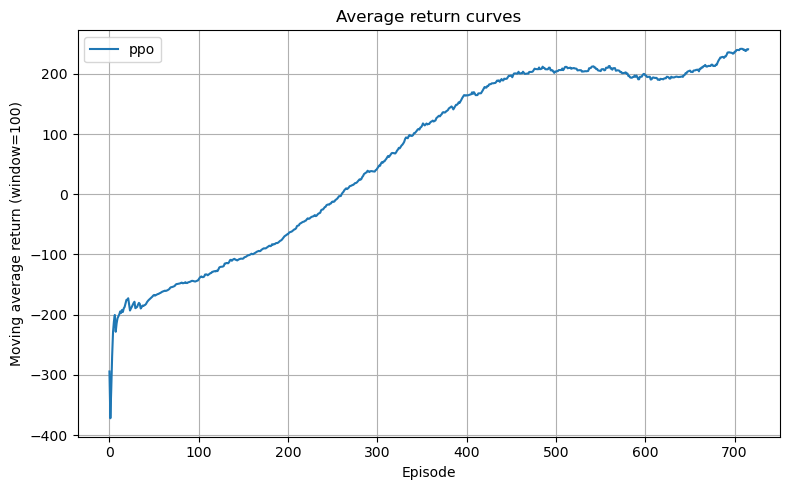

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
from typing import List

from PPO import PPOConfig, PPOAgent, train_loop_ppo, PPOExperimentResult

def plot_avg_return(results: List[PPOExperimentResult]):
    """Plot moving-average return curves for one or more experiments.

    results: a list of PPOExperimentResult objects, e.g.
        [result_ppo]
    """
    plt.figure(figsize=(8, 5))

    for res in results:
        steps = range(len(res.moving_avg_returns))
        label = f"{res.variant}"
        plt.plot(steps, res.moving_avg_returns, label=label)

    plt.xlabel("Episode")
    plt.ylabel("Moving average return (window=100)")
    plt.title("Average return curves")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

env = gym.make("LunarLander-v3")

ppo_config = PPOConfig()

result_ppo, agent_ppo = train_loop_ppo(env, ppo_config, variant="ppo")

env.close()

plot_avg_return([result_ppo])

In [ ]:
from evaluation import evaluate_policy

env = gym.make("LunarLander-v3")
env.reset()

metrics_ppo = evaluate_policy(env, agent_ppo.select_deterministic_action, num_episodes=10, seed=0)
for k, v in metrics_ppo.items():
    print(f"{k}: {v}")

env.close()

num_episodes: 10
mean_return: 257.8199157714844
std_return: 30.73005485534668
min_return: 198.15615844726562
max_return: 303.03546142578125
solved_rate: 0.9
success_rate: 1.0
crash_rate: 0.0
timeout_rate: 0.0
other_terminal_rate: 0.0
mean_episode_length: 245.1
mean_main_engine_usage: 13.0
mean_side_engine_usage: 131.0
num_success_episodes: 10
mean_final_abs_x_success: 0.09666262567043304
mean_final_abs_vy_success: 0.0
mean_final_abs_angle_success: 0.02141920104622841


# Hyperparameter Tuning

**Considering:**

*   LR_ACTOR: [3e-4, 1e-4]
*   LR_CRITIC: [1e-3, 5e-4]
*   CLIP_EPSILON: [0.2, 0.1]
*   ENTROPY_COEFF: [0.01, 0.005]


In [ ]:
lr_actors = [3e-4, 1e-4]
lr_critics = [1e-3, 5e-4]
clip_epsilons = [0.2, 0.1]
entropy_coeffs = [0.01, 0.005]

hp_configs = []

for lr_actor in lr_actors:
    for lr_critic in lr_critics:
        for clip_epsilon in clip_epsilons:
            for entropy_coeff in entropy_coeffs:
                config = PPOConfig(
                    LR_ACTOR=lr_actor,
                    LR_CRITIC=lr_critic,
                    CLIP_EPSILON=clip_epsilon,
                    ENTROPY_COEFF=entropy_coeff
                )
                config.variant = f"PPO_LR_A{lr_actor}_LR_C{lr_critic}_CLIP{clip_epsilon}_ENT{entropy_coeff}"
                hp_configs.append(config)

print(hp_configs[0].variant)

PPO_LR_A0.0003_LR_C0.001_CLIP0.2_ENT0.01


In [ ]:
import random
import numpy as np
import torch

experiment_results = []

for i, config in enumerate(hp_configs):
    print(f"Running experiment {i+1}: {config.variant}")
    env = gym.make("LunarLander-v3")

    # Reproducibility
    random.seed(config.SEED)
    np.random.seed(config.SEED)
    torch.manual_seed(config.SEED)
    env.reset(seed=config.SEED)

    result, _ = train_loop_ppo(env, config, variant=config.variant)
    experiment_results.append(result)
    env.close()

Running experiment 1: PPO_LR_A0.0003_LR_C0.001_CLIP0.2_ENT0.01
Running experiment 2: PPO_LR_A0.0003_LR_C0.001_CLIP0.2_ENT0.005
Running experiment 3: PPO_LR_A0.0003_LR_C0.001_CLIP0.1_ENT0.01
Running experiment 4: PPO_LR_A0.0003_LR_C0.001_CLIP0.1_ENT0.005
Running experiment 5: PPO_LR_A0.0003_LR_C0.0005_CLIP0.2_ENT0.01
Running experiment 6: PPO_LR_A0.0003_LR_C0.0005_CLIP0.2_ENT0.005
Running experiment 7: PPO_LR_A0.0003_LR_C0.0005_CLIP0.1_ENT0.01
Running experiment 8: PPO_LR_A0.0003_LR_C0.0005_CLIP0.1_ENT0.005
Running experiment 9: PPO_LR_A0.0001_LR_C0.001_CLIP0.2_ENT0.01
Running experiment 10: PPO_LR_A0.0001_LR_C0.001_CLIP0.2_ENT0.005
Running experiment 11: PPO_LR_A0.0001_LR_C0.001_CLIP0.1_ENT0.01
Running experiment 12: PPO_LR_A0.0001_LR_C0.001_CLIP0.1_ENT0.005
Running experiment 13: PPO_LR_A0.0001_LR_C0.0005_CLIP0.2_ENT0.01
Running experiment 14: PPO_LR_A0.0001_LR_C0.0005_CLIP0.2_ENT0.005
Running experiment 15: PPO_LR_A0.0001_LR_C0.0005_CLIP0.1_ENT0.01
Running experiment 16: PPO_LR_A0.00

In [ ]:
all_plots_data = []

for result in experiment_results:
    all_plots_data.append(result)

for i, result in enumerate(experiment_results):
    print(f"Experiment {result.variant}: final moving average return = {result.moving_avg_returns[-1]:.2f}")

Experiment PPO_LR_A0.0003_LR_C0.001_CLIP0.2_ENT0.01: final moving average return = 240.69
Experiment PPO_LR_A0.0003_LR_C0.001_CLIP0.2_ENT0.005: final moving average return = 253.54
Experiment PPO_LR_A0.0003_LR_C0.001_CLIP0.1_ENT0.01: final moving average return = 107.97
Experiment PPO_LR_A0.0003_LR_C0.001_CLIP0.1_ENT0.005: final moving average return = 112.43
Experiment PPO_LR_A0.0003_LR_C0.0005_CLIP0.2_ENT0.01: final moving average return = 167.11
Experiment PPO_LR_A0.0003_LR_C0.0005_CLIP0.2_ENT0.005: final moving average return = 125.81
Experiment PPO_LR_A0.0003_LR_C0.0005_CLIP0.1_ENT0.01: final moving average return = 181.36
Experiment PPO_LR_A0.0003_LR_C0.0005_CLIP0.1_ENT0.005: final moving average return = 86.46
Experiment PPO_LR_A0.0001_LR_C0.001_CLIP0.2_ENT0.01: final moving average return = 98.85
Experiment PPO_LR_A0.0001_LR_C0.001_CLIP0.2_ENT0.005: final moving average return = 79.83
Experiment PPO_LR_A0.0001_LR_C0.001_CLIP0.1_ENT0.01: final moving average return = 92.68
Exper

PPO_LR_A0.0003_LR_C0.001_CLIP0.2_ENT0.005


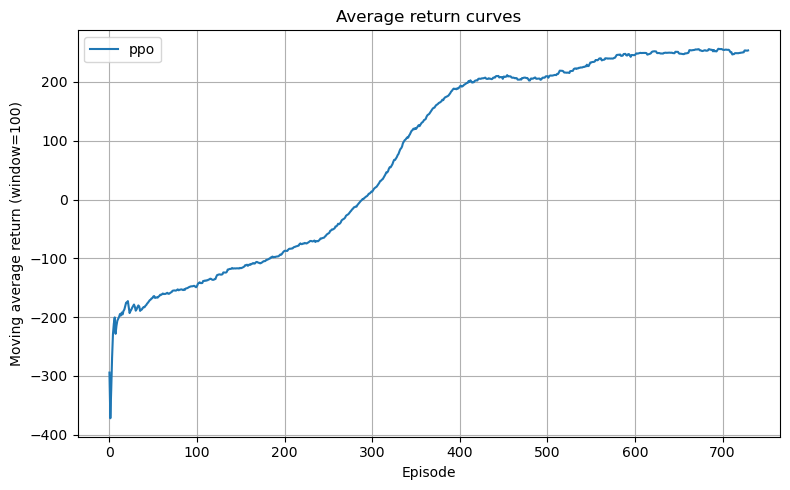

In [ ]:
best_config_by_return = None
max_final_return = -float('inf')

for result in experiment_results:
    current_final_return = result.moving_avg_returns[-1]

    if current_final_return > max_final_return:
        max_final_return = current_final_return
        best_config_by_return = result

env = gym.make("LunarLander-v3")

best_ppo_config = best_config_by_return.config
print(best_ppo_config.variant)

best_result_ppo, best_agent_ppo = train_loop_ppo(env, best_config_by_return.config, variant="ppo")

env.close()

plot_avg_return([best_result_ppo])

In [ ]:
from evaluation import evaluate_policy

env = gym.make("LunarLander-v3")
env.reset()

best_metrics_ppo = evaluate_policy(env, best_agent_ppo.select_deterministic_action, num_episodes=10, seed=0)
for k, v in best_metrics_ppo.items():
    print(f"{k}: {v}")

env.close()

num_episodes: 10
mean_return: 273.9485778808594
std_return: 24.618114471435547
min_return: 214.41970825195312
max_return: 304.05126953125
solved_rate: 1.0
success_rate: 1.0
crash_rate: 0.0
timeout_rate: 0.0
other_terminal_rate: 0.0
mean_episode_length: 262.5
mean_main_engine_usage: 33.3
mean_side_engine_usage: 151.9
num_success_episodes: 10
mean_final_abs_x_success: 0.15885396301746368
mean_final_abs_vy_success: 0.0
mean_final_abs_angle_success: 0.02681577205657959


# Ablation Study

To disable the following components, we:

**1. Generalized Advantage Estimation (GAE):** set GAE_LAMBDA to 1.0

**2. Clipped Surrogate Objective:** set CLIP_EPSILON to a very large value (e.g., 10.0)


In [ ]:
import copy

ablation_configs = []

# 1. Full PPO (base on best config)
ppo_full_config = copy.deepcopy(best_ppo_config)
ppo_full_config.variant = "PPO (Full)"
ablation_configs.append(ppo_full_config)

# 2. PPO without GAE
ppo_no_gae_config = copy.deepcopy(best_ppo_config)
ppo_no_gae_config.GAE_LAMBDA = 1.0  # Disable GAE
ppo_no_gae_config.variant = "PPO (No GAE)"
ablation_configs.append(ppo_no_gae_config)

# 3. PPO without Clipped Surrogate Objective
ppo_no_clip_config = copy.deepcopy(best_ppo_config)
ppo_no_clip_config.CLIP_EPSILON = 10.0 # Disable clipping by setting epsilon very high
ppo_no_clip_config.variant = "PPO (No Clipping)"
ablation_configs.append(ppo_no_clip_config)

# 4. PPO without both GAE and Clipped Surrogate Objective
ppo_no_gae_no_clip_config = copy.deepcopy(best_ppo_config)
ppo_no_gae_no_clip_config.GAE_LAMBDA = 1.0 # Disable GAE
ppo_no_gae_no_clip_config.CLIP_EPSILON = 10.0 # Disable clipping
ppo_no_gae_no_clip_config.variant = "PPO (No GAE, No Clipping)"
ablation_configs.append(ppo_no_gae_no_clip_config)


for config in ablation_configs:
    print(config.variant)

PPO (Full)
PPO (No GAE)
PPO (No Clipping)
PPO (No GAE, No Clipping)


In [ ]:
ablation_experiment_results = []

for i, config in enumerate(ablation_configs):
    print(f"Running ablation experiment {i+1}/{len(ablation_configs)}: {config.variant}")
    env = gym.make("LunarLander-v3")

    # Reproducibility
    random.seed(config.SEED)
    np.random.seed(config.SEED)
    torch.manual_seed(config.SEED)
    env.reset(seed=config.SEED)

    result, _ = train_loop_ppo(env, config, variant=config.variant)
    ablation_experiment_results.append(result)
    env.close()

Running ablation experiment 1/4: PPO (Full)
Running ablation experiment 2/4: PPO (No GAE)
Running ablation experiment 3/4: PPO (No Clipping)
Running ablation experiment 4/4: PPO (No GAE, No Clipping)


In [ ]:
print("Ablation Study Results (Final Moving Average Return):")
for result in ablation_experiment_results:
    final_return = result.moving_avg_returns[-1]
    print(f"  {result.variant}: {final_return:.2f}")

Ablation Study Results (Final Moving Average Return):
  PPO (Full): 253.54
  PPO (No GAE): 229.79
  PPO (No Clipping): 130.92
  PPO (No GAE, No Clipping): -4.70
